In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
original_path = "C:/Users/hpvic/Python/Images/Original/"
tampered_path = "C:/Users/hpvic/Python/Images/Tampered/"

original, tampered = [], []

for i in range(1, 451):
    img_path = original_path + str(i) + ".jpg"
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error loading image: {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (1920, 1080), interpolation=cv2.INTER_LINEAR)
    img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)
    
    # Append the image to the corresponding array based on the file name
    original.append(img)
    
# Print the lengths of the arrays to verify
print("Original length:", len(original))

Original length: 450


In [4]:
for i in range(1, 451):
    img_path = tampered_path + str(i) + ".jpg"
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error loading image: {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (1920, 1080), interpolation=cv2.INTER_LINEAR)
    img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)
    
    # Append the image to the corresponding array based on the file name
    tampered.append(img)
    
# Print the lengths of the arrays to verify
print("Tampered length:", len(tampered))

Tampered length: 450


In [5]:
combine = original + tampered

arr1 = np.full(450, "original")
arr2 = np.full(450, "tampered")

label = [*arr1, *arr2]

len(combine)

900

'tampered'

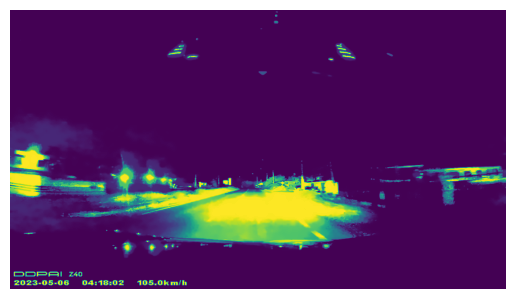

In [11]:
plt.imshow(combine[875]), plt.axis('off')
label[500]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [13]:
combine = np.array(combine)
label = np.array(label)

combine = (combine.reshape(combine.shape[0],combine.shape[1]*combine.shape[2]))

X_train,X_test,y_train,y_test = train_test_split(combine,label,test_size=0.3,random_state=42,shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(630, 2073600)
(630,)
(270, 2073600)
(270,)


In [14]:
mlp = MLPClassifier(hidden_layer_sizes = (200,100), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1000, random_state=42)

In [15]:
predict = mlp.predict(X_test)
predict

array(['original', 'tampered', 'original', 'tampered', 'original',
       'tampered', 'tampered', 'original', 'original', 'original',
       'original', 'tampered', 'tampered', 'original', 'tampered',
       'tampered', 'original', 'original', 'original', 'original',
       'original', 'original', 'original', 'original', 'tampered',
       'original', 'tampered', 'tampered', 'original', 'tampered',
       'original', 'tampered', 'tampered', 'original', 'tampered',
       'tampered', 'original', 'tampered', 'original', 'original',
       'original', 'tampered', 'original', 'tampered', 'original',
       'tampered', 'original', 'tampered', 'tampered', 'tampered',
       'tampered', 'tampered', 'tampered', 'tampered', 'original',
       'original', 'original', 'tampered', 'original', 'tampered',
       'original', 'tampered', 'original', 'original', 'original',
       'original', 'original', 'tampered', 'original', 'original',
       'tampered', 'tampered', 'tampered', 'original', 'origin

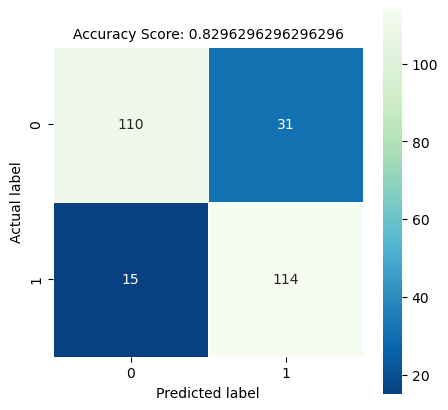

In [16]:
cm = metrics.confusion_matrix(y_test, predict)
score = mlp.score(X_test, y_test)

import seaborn as sns

plt.figure(figsize=(5,5))

sns.heatmap(cm, annot=True, fmt='d',
           linewidth=0.5, square=True, cmap='GnBu_r')

plt.xlabel("Predicted label",fontsize=10)
plt.ylabel("Actual label",fontsize=10)
plt.title("Accuracy Score: {0}".format(score),fontsize=10)
plt.show()

In [17]:
metrics.accuracy_score(y_test,predict)

0.8296296296296296

In [18]:
print(metrics.classification_report(y_test,predict,labels=mlp.classes_.tolist()))

              precision    recall  f1-score   support

    original       0.88      0.78      0.83       141
    tampered       0.79      0.88      0.83       129

    accuracy                           0.83       270
   macro avg       0.83      0.83      0.83       270
weighted avg       0.84      0.83      0.83       270



In [19]:
import joblib
path = "C:/Users/hpvic/Python/noise/"

filename = 'fogeryDetection3.sav'
joblib.dump(mlp, path+filename)

['C:/Users/hpvic/Python/noise/fogeryDetection3.sav']